In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import MinMaxScaler


In [2]:
db=pd.read_csv('CAvideos_cc50_202101.csv')

In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40881 non-null  object 
 1   trending_date           40881 non-null  object 
 2   title                   40881 non-null  object 
 3   channel_title           40881 non-null  object 
 4   category_id             40881 non-null  int64  
 5   publish_time            40881 non-null  object 
 6   tags                    40881 non-null  object 
 7   views                   40881 non-null  int64  
 8   likes                   40881 non-null  int64  
 9   dislikes                40881 non-null  int64  
 10  comment_count           40881 non-null  int64  
 11  thumbnail_link          40881 non-null  object 
 12  comments_disabled       40881 non-null  bool   
 13  ratings_disabled        40881 non-null  bool   
 14  video_error_or_removed  40881 non-null

In [7]:
db.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Manitoba,50.150025,-96.883322,POINT (-96.88332178 50.15002545)
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,British Columbia,49.099960,-116.516697,POINT (-116.516697 49.09996035)
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,New Brunswick,45.267042,-66.076675,POINT (-66.07667505000001 45.26704185)
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Saskatchewan,50.933311,-102.799989,POINT (-102.7999891 50.93331097)
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Alberta,53.016698,-112.816639,POINT (-112.8166386 53.01669802)


*Buscamos graficamente si hay valores faltantes*

<Axes: >

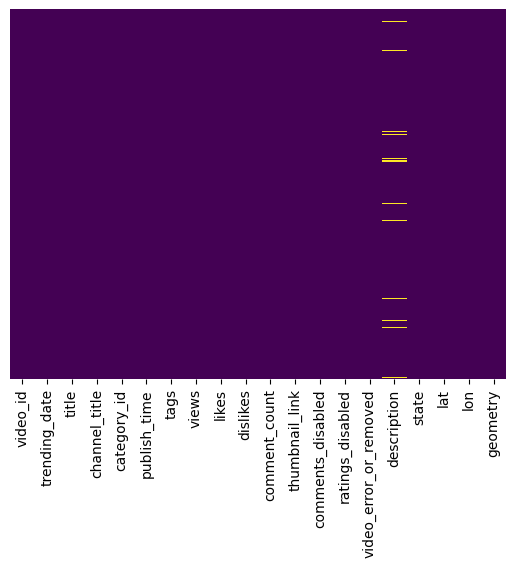

In [14]:
sns.heatmap(db.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Vamos a ver cuántos son

In [11]:
db.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

1296 datos equivalen aproximandamente al 3% de los datos totales, por lo cual podemos obviar dichos datos, puesto que no harían mucha diferencia respecto al total.

In [22]:
db=db.dropna()

<Axes: >

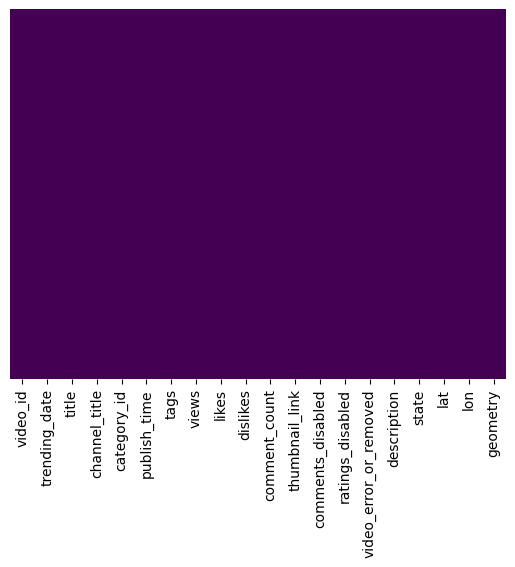

In [24]:
sns.heatmap(db.isnull(),yticklabels=False,cbar=False,cmap='viridis')

*Búsqueda de outliers*

In [25]:
db.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon
count,39585.000000,3.958500e+04,3.958500e+04,3.958500e+04,3.958500e+04,39585.000000,39585.000000
mean,20.778123,1.169234e+06,4.059694e+04,2.058693e+03,5.159716e+03,52.023377,-88.814717
std,6.808714,3.437842e+06,1.345967e+05,1.931258e+04,2.189959e+04,7.207378,25.119362
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00,44.566645,-139.000002
25%,20.000000,1.497150e+05,2.395000e+03,1.040000e+02,4.420000e+02,46.249282,-110.733329
50%,24.000000,3.831200e+05,9.244000e+03,3.140000e+02,1.357000e+03,49.822578,-81.236083
75%,24.000000,9.831390e+05,2.967000e+04,9.760000e+02,3.821000e+03,53.016698,-64.347995
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06,68.767467,-57.426919


In [52]:
def transform_outliers_to_median(data):
    median_value = np.median(data)
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 3 * iqr
    upper_bound = q3 + 3 * iqr
    
    transformed_data = np.where((data < lower_bound) | (data > upper_bound), median_value, data)
    return transformed_data

In [89]:
db_sin_outliers=db

db_sin_outliers['views']=transform_outliers_to_median(db['views'])
db_sin_outliers['likes']=transform_outliers_to_median(db['likes'])
db_sin_outliers['dislikes']=transform_outliers_to_median(db['dislikes'])
db_sin_outliers['comment_count']=transform_outliers_to_median(db['comment_count'])

views

<Axes: ylabel='views'>

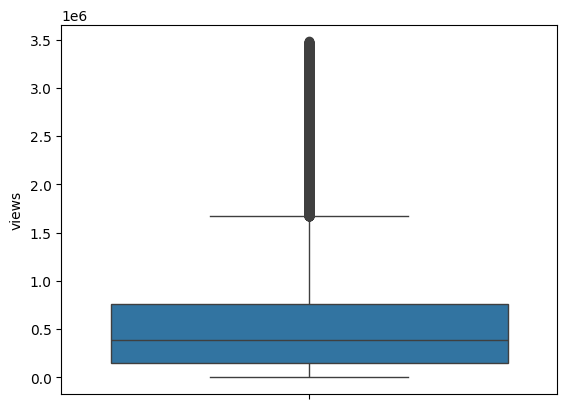

In [90]:
sns.boxplot(db_sin_outliers['views'])

<Axes: ylabel='views'>

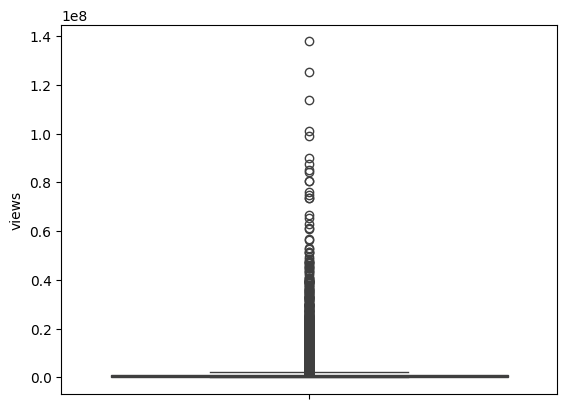

In [59]:
sns.boxplot(y=db['views'])

likes

<Axes: ylabel='likes'>

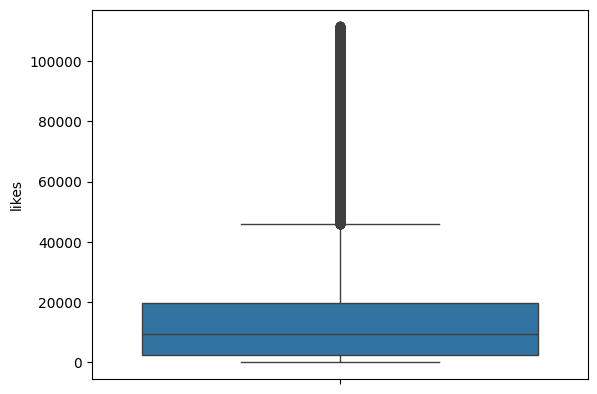

In [91]:
sns.boxplot(db_sin_outliers['likes'])

<Axes: ylabel='likes'>

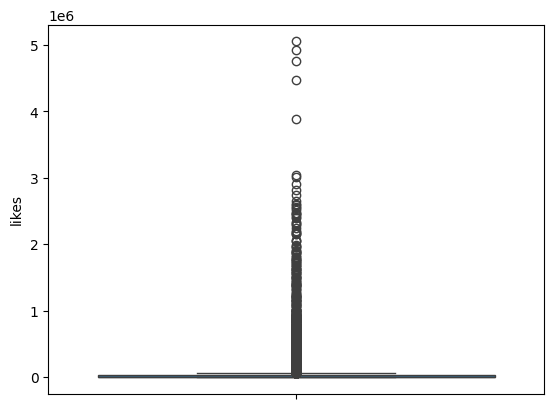

In [30]:
sns.boxplot(y=db['likes'])

dislikes

<Axes: ylabel='dislikes'>

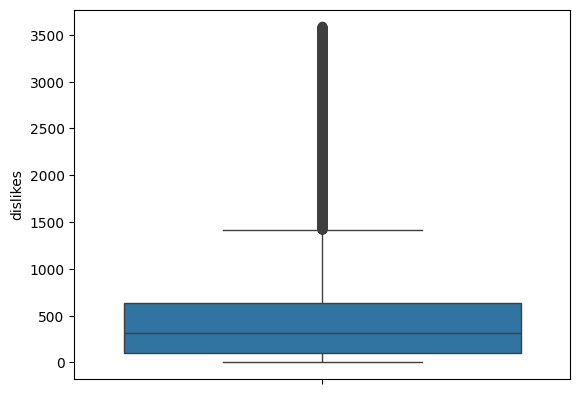

In [93]:
sns.boxplot(db_sin_outliers['dislikes']) 

<Axes: ylabel='dislikes'>

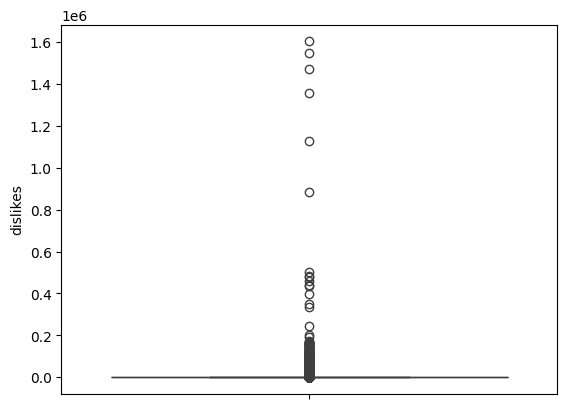

In [31]:
sns.boxplot(y=db['dislikes'])

comment count

<Axes: ylabel='comment_count'>

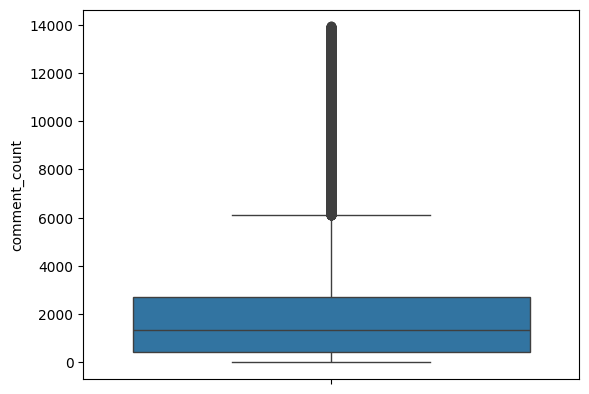

In [92]:
sns.boxplot(db_sin_outliers['comment_count']) 

<Axes: ylabel='comment_count'>

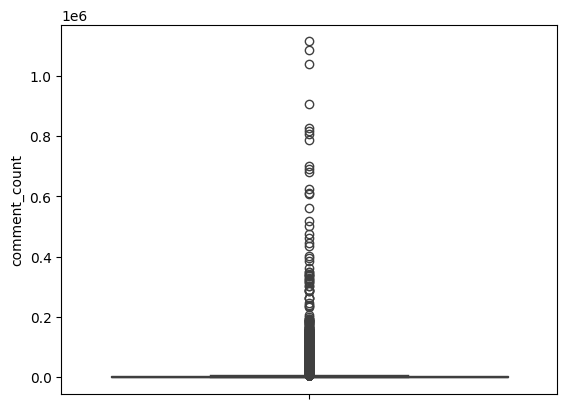

In [32]:
sns.boxplot(y=db['comment_count'])

eliminando columnas innecesarias

In [63]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39585 entries, 0 to 40880
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                39585 non-null  object 
 1   trending_date           39585 non-null  object 
 2   title                   39585 non-null  object 
 3   channel_title           39585 non-null  object 
 4   category_id             39585 non-null  int64  
 5   publish_time            39585 non-null  object 
 6   tags                    39585 non-null  object 
 7   views                   39585 non-null  int64  
 8   likes                   39585 non-null  int64  
 9   dislikes                39585 non-null  int64  
 10  comment_count           39585 non-null  int64  
 11  thumbnail_link          39585 non-null  object 
 12  comments_disabled       39585 non-null  bool   
 13  ratings_disabled        39585 non-null  bool   
 14  video_error_or_removed  39585 non-null  boo

In [64]:
db_sin_outliers.drop('thumbnail_link',axis=1,inplace=True)
db_sin_outliers.drop('description',axis=1,inplace=True)

In [94]:
scaler = MinMaxScaler()
db_sin_outliers['new_views'] = scaler.fit_transform(db_sin_outliers[['views']])
db_sin_outliers['new_likes'] = scaler.fit_transform(db_sin_outliers[['likes']])
db_sin_outliers['new_dislikes'] = scaler.fit_transform(db_sin_outliers[['dislikes']])
db_sin_outliers['new_comment_count'] = scaler.fit_transform(db_sin_outliers[['comment_count']])

In [95]:
db_sin_outliers.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon,new_views,new_likes,new_dislikes,new_comment_count
count,39585.000000,3.958500e+04,39585.000000,39585.000000,39585.000000,39585.000000,39585.000000,39585.000000,39585.000000,39585.000000,39585.000000
mean,20.778123,5.967367e+05,16157.893874,528.792699,2187.057749,52.023377,-88.814717,0.171146,0.144929,0.147255,0.156970
std,6.808714,6.756401e+05,21348.665614,678.688313,2678.181124,7.207378,25.119362,0.194014,0.191488,0.188997,0.192219
min,1.000000,7.330000e+02,0.000000,0.000000,0.000000,44.566645,-139.000002,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.497150e+05,2395.000000,104.000000,442.000000,46.249282,-110.733329,0.042781,0.021482,0.028961,0.031723
50%,24.000000,3.831200e+05,9244.000000,314.000000,1357.000000,49.822578,-81.236083,0.109805,0.082915,0.087441,0.097395
75%,24.000000,7.579970e+05,19809.000000,630.000000,2714.000000,53.016698,-64.347995,0.217453,0.177678,0.175439,0.194789
max,43.000000,3.483165e+06,111488.000000,3591.000000,13933.000000,68.767467,-57.426919,1.000000,1.000000,1.000000,1.000000


In [97]:
db_sin_outliers.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,state,lat,lon,geometry,new_views,new_likes,new_dislikes,new_comment_count
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",383120.0,9244.0,314.0,...,False,False,Manitoba,50.150025,-96.883322,POINT (-96.88332178 50.15002545),0.109805,0.082915,0.087441,0.097395
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,9244.0,1688.0,...,False,False,British Columbia,49.099960,-116.516697,POINT (-116.516697 49.09996035),0.291152,0.082915,0.470064,0.935190
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,9244.0,314.0,...,False,False,New Brunswick,45.267042,-66.076675,POINT (-66.07667505000001 45.26704185),0.916228,0.082915,0.087441,0.587167
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828.0,9244.0,1989.0,...,False,False,Saskatchewan,50.933311,-102.799989,POINT (-102.7999891 50.93331097),0.601618,0.082915,0.553885,0.097395
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",383120.0,9244.0,314.0,...,False,False,Alberta,53.016698,-112.816639,POINT (-112.8166386 53.01669802),0.109805,0.082915,0.087441,0.097395
